# Tensores y Autovalores

Este código cálcula los momentos centrados de orden 0, 1, y 2 para una serie de datos. Estos datos incluyen las posiciones de un sistema de partículas y los porcentajes del PIB en Colombia usados en defensa, salud, educación, y ciencia y tecnología en los últimos años. Además, para cada matriz de covarianza asociada se encuentran los autovalores y autovectores de dicha matriz.

Autores: \
Juan Andrés Guarín Rojas, 2200815.\
Juan Diego Figueroa Hernandez, 2201870.

Este programa se estructura en el siguiente orden:

* [1. Importación de librerías.](#section-1)
* [2. Sistema de partículas.](#section-2)
    * [2.1 Caso 2D.](#section-2.1)
    * [2.2 Caso 3D.](#section-2.2)
* [3. PIB.](#section-3)

## 1. Importación de librerías  <a class="anchor" id="section-1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

## 2. Sistema de partículas <a class="anchor" id="section-2"></a>

### 2.1 Caso 2D <a class="anchor" id="section-2.1"></a>

Esta sección se estructura de la siguiente manera:

* Lectura de datos.
* Cálculo de los momentos centrados.
* Determinación de los autovalores y autovectores.

### Lectura de datos

In [2]:
df = pd.read_csv('datosmasas.csv')
df = df.set_index('particula')
df

,masas,x,y,z
particula,,,,
1,2.0,-53.0,79.0,-91.0
2,2.0,13.0,-142.0,-177.0
3,2.0,-109.0,-103.0,-120.0
4,2.0,4.0,-96.0,110.0
5,4.0,222.0,-22.0,-236.0
...,...,...,...,...
1529,3.0,1646.0,1612.0,-30.0
1530,2.0,1610.0,1650.0,-145.0
1531,5.0,1626.0,1537.0,96.0


### Calculo de momentos centrados

Momento de orden 0.

In [5]:
# se suman todos los pesos de las partículas
nu_0 = sum(df['masas'].values)
print("nu_0 = ",nu_0)

nu_0 =  4627.0


Momento de orden 1.

In [6]:
# Se hallan algunos parametros
m = df['masas'].values                 # Vector con las masas.
N = np.size(m)                         # No. de partículas.

# Se halla el promedio en x y y.
p = np.array([sum(df['x'].values)/N, 
              sum(df['y'].values)/N])

# Se halla la matriz con las posiciones y el momento 1.
X = df.loc[:,'x':'y'].values         # Matriz 1533x2 con los datos de posición.
nu_1 = np.dot(m, X - p)              # "X-p" significa que a cada fila de X se le resta el vector p.

# Se divide entre la suma de masas para que nu_1 sea el centro de masas exacto.
nu_1 = nu_1 / sum(m)      

print("nu_1 = ",nu_1)

nu_1 =  [3.84130767 1.04833255]


Momento de orden 2

In [8]:
# Se declaran algunos parametros.
nu_2 = np.zeros((2,2))
x = df.loc[:,'x'].values  
y = df.loc[:,'y'].values  

# Se hallan las componentes de la matriz del momento 2.
nu_2[0][0] = np.dot(m,(x - p[0])**2)  # x-p[0] indica que a cada componente de x se le resta el escalar p[0],
                                      # (x-p[0])**2 indica que cada componente de (x-p[0]) se eleva al cuadrado.
nu_2[0][1] = np.dot(m,(x - p[0])*(y - p[1])) #(x-p[0])*(y-p[1]) indica multiplicacion componente a componente.
nu_2[1][0] = np.dot(m,(y - p[1])*(x - p[0])) 
nu_2[1][1] = np.dot(m,(y - p[0])**2) 

#Se modifica nu_2 para que sea el tensor de inercia.
nu_2[0][1] = -nu_2[0][1]
nu_2[1][0] = -nu_2[1][0]
aux = nu_2[0][0]
nu_2[0][0] = nu_2[1][1]
nu_2[1][1] = aux

#Mostrando resultados.
print("nu_2 = \n",nu_2)

nu_2 = 
 [[ 9.73052902e+08 -9.11766544e+08]
 [-9.11766544e+08  9.58603863e+08]]


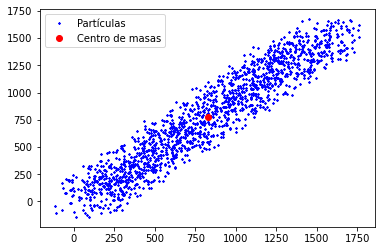

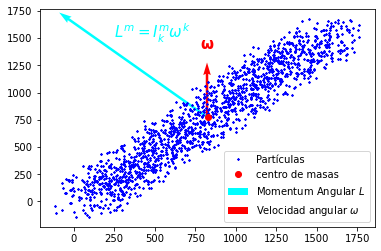

Centro de masas: [825.82, 776.92]

Centro geométrico: [821.97, 775.87]

Velocidad angular:
 w =  [[0]
 [1]]

Momentum lineal: 
L =  [[-9.11766544e+08]
 [ 9.58603863e+08]]


In [27]:
#Se grafica centro de masas y partículas.
plt.figure(figsize=(6,4))                                           # Tamaño de imagen de (6,4).
plt.plot(x,y, '*b', markersize=2, label="Partículas")               # Gráfica de las partículas.
plt.plot(nu_1[0]+p[0],nu_1[1]+p[1],'or',label="Centro de masas")    # Se le suman las coordenadas de p al centro de masas, pues 
                                                                        # nu_1, fue calculado en un sistema de coordenadas centrado en p
plt.legend()
plt.show()

#Se grafica centro de masas, partículas y el vector de momentum angular usando el tensor de inercia.

plt.figure(figsize=(6,4))
plt.plot(x,y, '*b', markersize=2,label="Partículas")
plt.plot(nu_1[0]+p[0],nu_1[1]+p[1],'or',label="centro de masas")

# Se calcula el momentum angular
w = np.array([[0],[1]])   #Un pseudovector de velocidad angular
L = np.dot(nu_2,w)        #El vector de momentum angular total del sistema, con la velocidad angular dada
plt.quiver(p[0],p[1],L[0]/1e6,L[1]/1e6,color='cyan',angles='xy', scale_units='xy', scale=1, label=r"Momentum Angular $L$")
plt.quiver(p[0],p[1],500*w[0],500*w[1],color='red',angles='xy', scale_units='xy', scale=1, label =r"Velocidad angular $\omega$")
plt.legend(loc=4)

# Se muetra texto en pantalla
plt.text(780, 1400, r'$\bf{\omega}$', fontsize=15, color='red')
plt.text(250, 1500, r'$L^{m}=I^{m}_{k} \omega^{k}$', fontsize=15, color='cyan')
plt.show()

print("Centro de masas: [{}, {}]".format(np.round(nu_1[0]+p[0],2),np.round(nu_1[1]+p[1],2)))
print("\nCentro geométrico: [{}, {}]".format(np.round(p[0],2),np.round(p[1],2)))
print("\nVelocidad angular:\n w = ",w)
print("\nMomentum lineal: \nL = ",L)

## Determinación de los autovalores y autovectores

In [28]:
e,v = np.linalg.eig(nu_2)
v1 = v[:,0]               #autovector uno
v2 = v[:,1]               #autovector dos

print("Autovalores = ",e)
print("\nAutovectores = \n",v)

Autovalores =  [1.87762355e+09 5.40332166e+07]

Autovectores = 
 [[ 0.7099026   0.70429986]
 [-0.70429986  0.7099026 ]]


### Caso 3D <a class="anchor" id="section-2.2"></a>

Esta sección se estructura de la siguiente manera:

* Lectura de datos.
* Cálculo de los momentos centrados.
* Determinación de los autovalores y autovectores.

## 3. PIB <a class="anchor" id="section-3"></a>

Esta sección se estructura de la siguiente manera:

* Lectura de datos.
* Cálculo de la matriz de covarianza y correlación.
* Determinación de los autovalores y autovectores.
* Matriz de Transformación del Espacio Normal al Espacio Propio.

### Lectura de datos

In [29]:
DF = pd.read_csv('porcentages_pib.csv')
DF = DF.set_index('index')
DF

,year,defense,health,education,science and technology
index,,,,,
1,2004,3.465015,5.798928,4.07935,0.15353
2,2005,3.352873,6.067098,4.02099,0.15086
3,2006,3.276131,6.335515,3.91672,0.14950
4,2007,3.266740,6.491028,4.08301,0.18455
5,2008,3.744606,6.841927,3.93878,0.20125
6,2009,3.885354,7.311347,4.77652,0.19608
7,2010,3.642756,7.071301,4.83383,0.19501
8,2011,3.081614,6.780768,4.46608,0.20595
9,2012,3.158960,6.745996,4.37039,0.23378


### Cálculo de la matriz de covarianza y correlación

Matriz de covarianza: cov = 
 [[ 0.94495027 -0.451933   -0.00736043 -0.08856462]
 [-0.451933    4.64968509  1.68248451  0.3044009 ]
 [-0.00736043  1.68248451  1.44143567  0.13665563]
 [-0.08856462  0.3044009   0.13665563  0.03508754]]

Matriz de correlación: corr = 
 [[ 1.         -0.2156045  -0.00630668 -0.48638404]
 [-0.2156045   1.          0.64989272  0.75362919]
 [-0.00630668  0.64989272  1.          0.60764995]
 [-0.48638404  0.75362919  0.60764995  1.        ]]


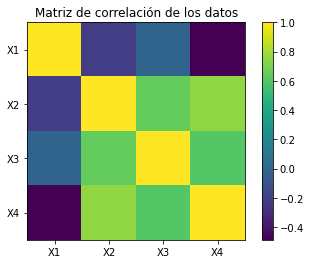

In [30]:
#Matriz de covarianza, usando el momento centrado de orden 2.
years = DF['year'].values
N = np.size(years)                           #Cantidad de años.
P = np.array([sum(DF['defense'].values)/N,   #Promedios en defensa, salud, educacion, y ciencia y tecnología.
              sum(DF['health'].values)/N,
              sum(DF['education'].values)/N,
              sum(DF['science and technology'].values)/N])


X1 = DF['defense'].values #Datos de defensa para todos los años.
X2 = DF['health'].values
X3 = DF['education'].values
X4 = DF['science and technology'].values

cov = np.zeros((4,4))            #matriz de covarianza.
cov[0][0] = sum((X1 - P[0])**2)  #En este caso, X1-P[0] indica que a cada componente de X1 se le resta P[0],
                                 #y aX1más (X1-P[0])**2 indica que cada componente de (X1-P[0]) se eleva al cuadrado.
cov[1][1] = sum((X2 - P[1])**2) 
cov[2][2] = sum((X3 - P[2])**2) 
cov[3][3] = sum((X4 - P[3])**2) 

cov[0][1] = sum((X1 - P[0])*(X2 - P[1])) #En este caso, (X1-P[0])*(X2-P[1]) indica multiplicacion componente a componente.
cov[0][2] = sum((X1 - P[0])*(X3 - P[2]))
cov[0][3] = sum((X1 - P[0])*(X4 - P[3])) 

cov[1][0] = sum((X2 - P[1])*(X1 - P[0])) 
cov[1][2] = sum((X2 - P[1])*(X3 - P[2])) 
cov[1][3] = sum((X2 - P[1])*(X4 - P[3])) 

cov[2][0] = sum((X3 - P[2])*(X1 - P[0]))
cov[2][1] = sum((X3 - P[2])*(X2 - P[1])) 
cov[2][3] = sum((X3 - P[2])*(X4 - P[3])) 

cov[3][0] = sum((X4 - P[3])*(X1 - P[0])) 
cov[3][1] = sum((X4 - P[3])*(X2 - P[1])) 
cov[3][2] = sum((X4 - P[3])*(X3 - P[2])) 

#Matriz de correlación.
sigmas = [[np.sqrt(sum( (X1-P[0])**2 ))],  #Desviación estándar de los datos respecto a su promedio.
          [np.sqrt(sum( (X2-P[1])**2 ))],
          [np.sqrt(sum( (X3-P[2])**2 ))],
          [np.sqrt(sum( (X4-P[3])**2 ))]]

Sigma = np.dot(sigmas, np.transpose(sigmas))

corr = cov / Sigma           #En este caso, cov/Sigma indica división componente a componente.

#Mostrar resultados.
print("Matriz de covarianza: cov = \n",cov)
print("\nMatriz de correlación: corr = \n", corr)

plt.figure()
plt.title("Matriz de correlación de los datos")
plt.xticks(range(4),['X1','X2','X3','X4'])
plt.yticks(range(4),['X1','X2','X3','X4'])
plt.imshow(corr)
plt.colorbar()
plt.show()

### Determinación de los autovalores y autovectores

In [31]:
E,V = np.linalg.eig(cov)
V1 = V[:,0].reshape((4,1))          #Autovector uno.
V2 = V[:,1].reshape((4,1))          #Autovector dos.
V1 = V[:,0].reshape((4,1))          #Autovector tres.
V2 = V[:,1].reshape((4,1))          #Autovector cuatro.

print("Autovalores = ",E)
print("\nAutovectores = \n",V)

Autovalores =  [5.43093764 1.00923497 0.62145049 0.00953547]

Autovectores = 
 [[ 0.09402548 -0.85626105 -0.50251671  0.07384556]
 [-0.91465725  0.12102433 -0.38345273 -0.04146357]
 [-0.388067   -0.50009899  0.77278639 -0.04589344]
 [-0.06297087  0.04550954  0.05693992  0.99534989]]


### Matriz de Transformación del Espacio Normal al Espacio Propio.

In [36]:
#Base normal
e1 = np.array([[1],[0],[0],[2]])
e2 = np.array([[0],[1],[0],[2]])
e3 = np.array([[0],[0],[1],[2]])
e4 = np.array([[0],[0],[0],[1]])

# Se crea la matriz B con los vectores de la base como columnas
B=np.array([np.transpose(e1)[0],np.transpose(e2)[0],np.transpose(e3)[0],np.transpose(e4)[0]])
B=np.transpose(B)

#Matriz de cambio de coordenadas de la base propia a la normal.
M = np.dot(np.linalg.inv(V),B)
print("M = ",M)

M =  [[-0.03191625 -1.04059898 -0.51400873 -0.06297087]
 [-0.76524198  0.2120434  -0.40907991  0.04550954]
 [-0.38863688 -0.2695729   0.88666622  0.05693992]
 [ 2.06454534  1.94923621  1.94480633  0.99534989]]


## Tests

In [11]:
from sympy import *
x = Symbol('x')
y = Symbol('y')

In [20]:
np.linalg.inv(V)

array([[ 0.09402548, -0.91465725, -0.388067  , -0.06297087],
       [-0.85626105,  0.12102433, -0.50009899,  0.04550954],
       [-0.50251671, -0.38345273,  0.77278639,  0.05693992],
       [ 0.07384556, -0.04146357, -0.04589344,  0.99534989]])

In [18]:
x1

x^1

In [32]:
diff(0.9*x1,x1)

0.900000000000000

In [22]:
np.dot(B,xx)

array([[x^1],
       [x^2],
       [x^3],
       [x^4]], dtype=object)

In [62]:
V1

array([[ 0.09402548],
       [-0.91465725],
       [-0.388067  ],
       [-0.06297087]])

In [74]:
TT = np.zeros((4,4))

for i in range(4):
    for j in range(4):
        TT[i][j] = np.dot(B[:,i].reshape(4,),V[:,j].reshape(4,))

TT-M

array([[ 4.99600361e-16,  5.83961958e-02, -1.14449719e-01,
         1.36816428e-01],
       [-5.83961958e-02, -1.52655666e-16,  1.16646257e-01,
        -8.69731037e-02],
       [ 1.14449719e-01, -1.16646257e-01, -4.44089210e-16,
        -1.02833358e-01],
       [-1.36816428e-01,  8.69731037e-02,  1.02833358e-01,
         4.44089210e-16]])

In [71]:
T

array([[ 0.09402548, -0.91465725, -0.388067  , -0.06297087],
       [-0.85626105,  0.12102433, -0.50009899,  0.04550954],
       [-0.50251671, -0.38345273,  0.77278639,  0.05693992],
       [ 0.07384556, -0.04146357, -0.04589344,  0.99534989]])

In [72]:
TT

array([[ 0.09402548, -0.85626105, -0.50251671,  0.07384556],
       [-0.91465725,  0.12102433, -0.38345273, -0.04146357],
       [-0.388067  , -0.50009899,  0.77278639, -0.04589344],
       [-0.06297087,  0.04550954,  0.05693992,  0.99534989]])

## PIB

In [40]:
M=np.ones(2)
N=np.array([[1,3],[2,4]])

In [42]:
N/M

array([[1., 3.],
       [2., 4.]])

In [39]:
e1 = np.array([[1],[2],[3],[4]])
e2 = np.array([[0],[1],[0],[0]])
e3 = np.array([[0],[0],[1],[0]])
e4 = np.array([[0],[0],[0],[1]])

B=np.array([np.transpose(e1)[0],np.transpose(e2)[0],np.transpose(e3)[0],np.transpose(e4)[0]])
B=np.transpose(B)
B

array([[1, 0, 0, 0],
       [2, 1, 0, 0],
       [3, 0, 1, 0],
       [4, 0, 0, 1]])

## Sistema de partículas

In [15]:
df['masas'].values

array([2., 2., 2., ..., 5., 2., 2.])

In [27]:
a=np.array([1,2,3])
b=np.array([2,4,5])
np.dot(a,b)

25

In [28]:
np.size(a)

3

In [35]:
df.loc[1533,'x':'z'].values

array([1717., 1464.,  -59.])

In [85]:
df.loc[1:3,'x':'z'].values

array([[ -53.,   79.,  -91.],
       [  13., -142., -177.],
       [-109., -103., -120.]])

In [95]:
m=[1,2,3]
np.dot(m,[[2,2,2],[3,3,3],[4,4,4]])

array([20, 20, 20])

In [45]:
np.dot(m,df['x'].values)/sum(m)

825.8152150421439

array([ 2.27373675e-13, -1.13686838e-13])

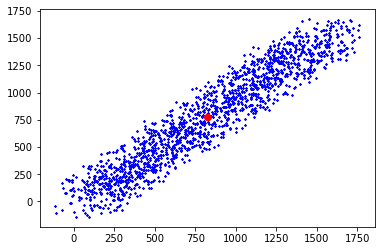

In [8]:
X = df['x'].values
Y = df['y'].values
plt.figure(figsize=(6,4))
plt.plot(X,Y, '*b', markersize=2)
#plt.plot(p[0],p[1],'om') #punto muy cercano al centro de masas - en realidad, es el centro geométrico.
plt.plot(nu_1[0]/sum(m)+p[0],nu_1[1]/sum(m)+p[1],'or',label="centro de masas")
plt.plot(np.dot(m,df['x'].values)/sum(m),np.dot(m,df['y'].values)/sum(m),'or')

cm = np.array([np.dot(m,df['x'].values)/sum(m),np.dot(m,df['y'].values)/sum(m)])
#nu = np.array([nu_1[0],nu_1[1],0])
#np.cross(cm,nu)
cm2 = [nu_1[0]+p[0],nu_1[1]+p[1]]
cm-cm2 #el error es casi cero

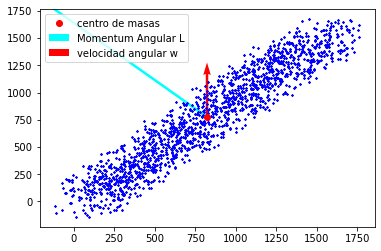

In [164]:
X = df['x'].values
Y = df['y'].values
plt.figure(figsize=(6,4))
plt.plot(X,Y, '*b', markersize=2)
plt.plot(nu_1[0]/sum(m)+p[0],nu_1[1]/sum(m)+p[1],'or',label="centro de masas")

w = np.array([[0],[1]])
L = np.dot(nu_2,w)
plt.quiver(p[0],p[1],L[0],L[1],color='cyan',angles='xy', scale_units='xy', scale=1, label="Momentum Angular L")
plt.quiver(p[0],p[1],500*w[0],500*w[1],color='red',angles='xy', scale_units='xy', scale=1, label ="velocidad angular w")


In [71]:
np.cross(a,b)

array([-2,  1,  0])

In [77]:
nu

array([17773.73059361,  4850.6347032 ])

In [79]:
a=[1,0,0]
b=[2,1,0]
np.cross(a,b)

array([0, 0, 1])

In [104]:
M=np.zeros((2,2))

In [106]:
M[0][0]

0.0

In [110]:
M-p

array([[-821.97390737, -775.87018917],
       [-821.97390737, -775.87018917]])

In [109]:
a=np.array([1,2,3])
b=np.array([2,4,5])
a*b

array([ 2,  8, 15])